IA & Data science (LU3IN0226) -- 2021-2022
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Olivier Schwander.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

WANG Zhe, LIN Charles

Ce projet peut être fait (c'est même recommandé) en binôme. Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-1</tt> et rajouter à la suite de <tt>projet-1</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-1-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 1 - mars 2022


<font size="+1" color="RED"><b>Date de rendu : vendredi 25 mars, 18h au plus tard</b></font>
<br />


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur:
- les données Bases_IADS : cela correspond à un problème de classification binaire
- les données Bases_IADS_multiclasses : cela correspond à un problème de classification multiclasses

Très important : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivantes:

          -- ce_notebook.ipynb
          -- Bases_IADS/ 
              -- README.txt
              -- train.csv
              -- test.csv
              -- eval.csv
              -- names.csv
          -- Bases_IADS_multiclasses/
              -- README.txt
              -- train_multi.csv
              -- test_multi.csv
              -- eval_multi.csv
              -- names_multi.csv

Dans le notebook, le chargement des fichiers de données considèrera donc cette arborescence.


Les fichiers de chaque répertoire correspondent à:
- fichier README.txt : donne des explications sur le contenu du répertoire
- fichier train*.csv : base d'apprentissage à utiliser pour construire le classfieur
- fichier test*.csv : base de test pour évaluer vous même le classifieur construit. Les exemples de ce fichier NE DOIVENT PAS être utilisés pour l'apprentissage du classifieur.
- fichier eval*.csv : fichier d'évaluation du classifieur (voir ci-dessous).

## Travail à faire

Pour chaque ensemble de données:
- les 2 algorithmes d'apprentissage knn et perceptron doivent être expérimentés et comparés (ATTENTION: on ne veut que des algorithmes que vous avez implémentés vous-même dans cette UE).
- des résultats d'expérimentations pourront être : comparaison des taux de bonne classification apprentissage / test (avec validation croisée), visualisation, etc.
- de plus, un fichier `eval.csv` est fourni. Ce fichier contient des descriptions associées à un "faux" label. Dans votre compte-rendu, vous devez fournir un fichier CSV qui donne, pour chaque exemple du fichier `eval.csv`la classe trouvée par votre meilleur classifieur. Ainsi, le fichier CSV à rendre doit comporter 2 colonnes et autant de lignes que d'exemples (une ligne par exemple du fichier eval):<br>
            IDENTIFIANT;CLASSE_TROUVEE_POUR_CET_EXEMPLE
            ...
Le résultat de classification vous sera donné en retour (nous connaissons la vraie classe des exemples de ce fichier...).

Vos **expérimentations doivent être expliquées** (utilisez des boîtes Markdown pour saisir vos explications):
- une argumentation du type *"pourquoi vous avez fait cette expérimentation"* doit être fournie;
- une analyse succincte du résultat fourni doit être aussi donnée.


Par exemple (indicatif): choix de $k$ pour le knn:
- argumentation : pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes et de comparer les taux de bonne classification sur la base de test obtenus.
- analyse du résultat: on remarque que la valeur $k$ suivante fournie le meilleur résultat.



## Travail à rendre
Ce qui doit être rendu : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement)
- ce notebook, dans lequel vous avez reporté toutes les fonctions que vous utilisez : ce notebook doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). Les fichiers de données ne doivent pas être inclus dans votre archive !
- un fichier CSV dont le nom est de la forme: *projet-1-Nom1_Nom2.csv* (sur le modèle du nom du notebook) qui donne la classe de chaque exemple du fichier `eval.csv` trouvée par votre classifieur.


**Remarque**: en considérant que les algorithmes knn et perceptron ont été réalisés lors des séances de TME 1 à 6, le travail demandé pour ce projet correspond à, au plus, une séance complète de TME.

<font size="+3" color="RED">Classification binaire</front>

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import copy

In [2]:
class Classifier:
    """ Classe (abstraite) pour représenter un classifieur
        Attention: cette classe est ne doit pas être instanciée.
    """ 
    def __init__(self, input_dimension):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension de la description des exemples
            Hypothèse : input_dimension > 0
        """
        raise NotImplementedError("Please Implement this method")
        
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        raise NotImplementedError("Please Implement this method")
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")

    def accuracy(self, desc_set, label_set):
        """ Permet de calculer la qualité du système sur un dataset donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        sum = 0
        for i in range(label_set.size):
            if(self.predict(desc_set[i]) == label_set[i]):
                sum += 1
        return sum / label_set.size

## Lecture et conversion des données

In [3]:
names = pd.read_csv("Bases_IADS/names.csv", header=None, sep = ";")

train = pd.read_csv("Bases_IADS/train.csv", sep = ";", header=None)
test = pd.read_csv("Bases_IADS/test.csv", sep = ";", header=None)
eval = pd.read_csv("Bases_IADS/eval.csv", sep = ";", header=None)

train = train.set_axis(np.array(names)[0], axis=1, inplace=False)
test = test.set_axis(np.array(names)[0], axis=1, inplace=False)
eval = eval.set_axis(np.array(names)[0], axis=1, inplace=False)

train_desc = np.array(train.iloc[:, 1:-1], dtype="float")
train_label = np.array(train['label'])

test_desc = np.array(test.iloc[:, 1:-1], dtype="float")
test_label = np.array(test['label'])

eval_desc = np.array(eval.iloc[:, 1:-1], dtype="float")
eval_label = np.array(eval['label'])

# Test sur le classifieur KNN

Du fait d'un nombre important de point nous avons ajouter les méthodes nearest_matrix et setK au ClassifierKNN, car pour chaque nouveau k un nouveau tableau des plus proches voisin au points x est calculé.

Ainsi dans nearest_matrix, nous calculons le tableau des plus proches voisin pour chacun des points.

Et la méthode setK elle servira a mettre a jour le nombre de plus proche voisin a prendre en compte.

Ensuite nous avons modifier les méthodes predict, score et accuracy.

accuracy va d'abord lancer un appel a nearest_matrix si la méthode est appelé pour la premiere fois, et il passera non plus la une donnée de desc_set a predict mais son index, qui servira a faire le lien avec le table des plus proches voisin n_m. Donc predict et score prendront un index en paramètre.

score récupèrera maintenant le tableau triéer des plus proches voisin directement dans n_m.

**n_m[index du point de test_desc] -> tableau triéer des plus proches voisin aux point de train_desc**

In [4]:
class ClassifierKNN(Classifier):
    """ Classe pour représenter un classifieur par K plus proches voisins.
        Cette classe hérite de la classe Classifier
    """
    def __init__(self, input_dimension, k):
        self.input_dimension = input_dimension
        self.k = k
        self.n_m = None
        
    def score(self, index):
        positiv = 0
        for k in range(self.k):
            if self.label_set[self.n_m[index][k]] == 1:
                positiv += 1
        return 2*(positiv/self.k - 0.5)
    
    def predict(self, index):
        return 1 if (self.score(index) > 0) else -1
        
    def train(self, desc_set, label_set):
        self.desc_set = desc_set
        self.label_set = label_set
        
    def nearest_matrix(self, desc_set, label_set):
        l_size = label_set.size
        n_m = []
        
        for i in range(l_size):
            tab = [0 for x in range(self.label_set.size)]
            for j in range(self.label_set.size):
                tab[j] = np.linalg.norm(desc_set[i] - self.desc_set[j])
            n_m.append(np.argsort(tab, axis=0))
        self.n_m = n_m
    
    def setK(self, k):
        self.k = k
        
    def accuracy(self, desc_set, label_set):
        if(self.n_m == None):
            self.nearest_matrix(desc_set, label_set) 
        sum = 0
        for index in range(label_set.size):
            if(self.predict(index) == label_set[index]):
                sum += 1
        return sum / label_set.size

0.948


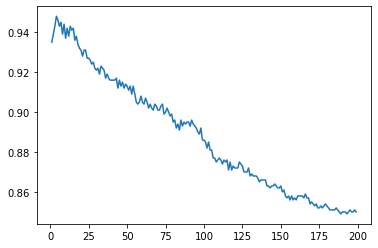

In [5]:
k_init = 1
k_final = 200
pas = 1

knn = ClassifierKNN(len(train_desc[0]),1)
knn.train(train_desc, train_label)

perfs, k_list = [], []
for k in range(k_init, k_final, pas):
    knn.setK(k)
    perfs.append(knn.accuracy(test_desc, test_label))
    k_list.append(k)

plt.plot(k_list, perfs)

print(np.max(perfs))

On observe que la meilleur performances trouvée est de **0.948** pour **k = 3**.

# Test sur le perceptron

In [6]:
class ClassifierPerceptron(Classifier):
    """ Perceptron de Rosenblatt
    """
    def __init__(self, input_dimension, learning_rate, init=0):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (>0)
                - learning_rate : epsilon
                - init est le mode d'initialisation de w: 
                    - si 0 (par défaut): initialisation à 0 de w,
                    - si 1 : initialisation par tirage aléatoire de valeurs petites
        """
        self.input_dimension = input_dimension
        self.learning_rate = learning_rate
        if init == 0:
            self.w = np.zeros(input_dimension)
        else:
            v = np.random.uniform(0,1,input_dimension)
            self.w = (2*v-1)*0.001

        
    def train_step(self, desc_set, label_set):
        """ Réalise une unique itération sur tous les exemples du dataset
            donné en prenant les exemples aléatoirement.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
        """
        order = np.arange(label_set.size)
        np.random.shuffle(order)
        
        for i in order:
            if self.predict(desc_set[i]) != label_set[i]:
                self.w += label_set[i]*desc_set[i]*self.learning_rate
     
    def train(self, desc_set, label_set, niter_max=100, seuil=0.001):
        """ Apprentissage itératif du perceptron sur le dataset donné.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
                - niter_max (par défaut: 100) : nombre d'itérations maximale
                - seuil (par défaut: 0.01) : seuil de convergence
            Retour: la fonction rend une liste
                - liste des valeurs de norme de différences
        """
        list = []
        for i in range(niter_max):
            oldw = self.w.copy()
            self.train_step(desc_set, label_set)
            norm = np.linalg.norm(self.w - oldw)
            list.append(norm)
            if norm < seuil:
                break
        return list
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        return np.dot(self.w, x)
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        return 1 if np.sign(self.score(x)) >= 0 else -1

In [7]:
# réduction à 50 dimensions
ndim = 100
lam, V = np.linalg.eigh(train_desc.T @ train_desc)
lammax = np.argsort(lam)
Vmax = V[:, [lammax[-i] for i in range(1, ndim+1)]]

train_desc_r = train_desc @ Vmax
test_desc_r = test_desc @ Vmax

In [8]:
perceptron = ClassifierPerceptron(len(train_desc[0]), 1e-3)
perceptron.train(train_desc, train_label, niter_max = 1000)
perceptron.accuracy(test_desc, test_label)

0.867

# CSV

#### Nous avons obtenu un meilleur résultat avec le classifieur KNN pour la classifcation binaire avec k=3

In [10]:
knn.setK(3)

for index in range(eval_label.size):
    eval_label[index] = knn.predict(index)
    
df = pd.DataFrame(eval['ident']).join(pd.DataFrame(eval_label))
df = df.rename(columns={"ident":'IDENTIFIANT', 0:"CLASSE_TROUVEE_POUR_CET_EXEMPLE"})
df.to_csv('./projet-1-WANG_LIN_BINAIRE.csv', sep=";", index=False)

<font size="+3" color="RED">Classification multiclasse</front>

# Lecture et conversion des données

In [11]:
names = pd.read_csv("Bases_IADS_multiclasses/names_multi.csv", header=None, sep = ";")

train = pd.read_csv("Bases_IADS_multiclasses/train_multi.csv", sep = ";", header=None)
test = pd.read_csv("Bases_IADS_multiclasses/test_multi.csv", sep = ";", header=None)
eval = pd.read_csv("Bases_IADS_multiclasses/eval_multi.csv", sep = ";", header=None)

train = train.set_axis(np.array(names)[0], axis=1, inplace=False)
test = test.set_axis(np.array(names)[0], axis=1, inplace=False)
eval = eval.set_axis(np.array(names)[0], axis=1, inplace=False)

train_desc = np.array(train.iloc[:, 1:-1])
train_label = np.array(train['label'])

test_desc = np.array(test.iloc[:, 1:-1])
test_label = np.array(test['label'])

eval_desc = np.array(eval.iloc[:, 1:-1])
eval_label = np.array(eval['label'])

# Test le KNN

Pour les même souci que nous avons rencontrer avec le KNN sur la classification binaire, nous devons modifier ClassifierMultiOAA_KNN pour l'adapter au fonctionnement du KNN pour faciliter les test.

- ajout de la méthode setK
- passage en argument de l'index des point au lieu de les passer directement

In [12]:
class ClassifierMultiOAA_KNN(Classifier):
    def  __init__(self , classif) :
        self.classif = classif
        self.classifs = []

    def train(self, desc_set , label_set) : 
        self.labels = np.unique(label_set)
        
        for lab in self.labels : 
            new_classif = copy.deepcopy(self.classif)
            new_label_set = np.where(label_set == lab, 1 ,-1)
            new_classif.train(desc_set, new_label_set)
            self.classifs.append(new_classif)
            
    def score(self, index):
        return [c.score(index) for c in self.classifs]
    
    def predict(self , index):
        return self.labels[np.argmax(self.score(index))]
    
    def setK(self, k):
        for c in self.classifs:
            c.setK(k)
    
    def accuracy(self, desc_set, label_set):
        """ Permet de calculer la qualité du système sur un dataset donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        if self.classifs[0].n_m == None:
            self.classifs[0].nearest_matrix(desc_set, label_set)
            for i in range(1, len(self.classifs)):
                self.classifs[i].n_m = self.classifs[0].n_m
        
        sum = 0
        for index in range(label_set.size):
            if(self.predict(index) == label_set[index]):
                sum += 1
        return sum / label_set.size

0.9025


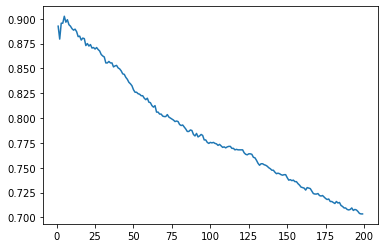

In [13]:
k_init = 1
k_final = 200
pas = 1

clissif_KNN = ClassifierKNN(len(train_desc[0]), 1)
mooa_KNN = ClassifierMultiOAA_KNN(clissif_KNN)
mooa_KNN.train(train_desc, train_label)

perfs, k_list = [], []
for k in range(k_init, k_final, pas):
    mooa_KNN.setK(k)
    perfs.append(mooa_KNN.accuracy(test_desc, test_label))
    k_list.append(k)

plt.plot(k_list, perfs)

print(np.max(perfs))

# Test sur perceptron

In [14]:
class ClassifierMultiOAA(Classifier) : 
    def  __init__(self , classif) :
        self.classif = classif 
        self.classifs = []

    def train( self, desc_set , label_set, niter_max= 100, seuil = 0.0001) : 
        self.labels = np.unique(label_set)
        
        for lab in self.labels : 
            new_classif = copy.deepcopy(self.classif)
            new_label_set = np.where(label_set == lab, 1 ,-1)
            new_classif.train(desc_set, new_label_set, niter_max, seuil)
            self.classifs.append(new_classif)
            
    def score(self, x):
        return [c.score(x) for c in self.classifs]
    
    def predict(self , x) :
        return self.labels[np.argmax(self.score(x))]

In [15]:
# réduction à 50 dimensions
ndim = 100
lam, V = np.linalg.eigh(train_desc.T @ train_desc)
lammax = np.argsort(lam)
Vmax = V[:, [lammax[-i] for i in range(1, ndim+1)]]

train_desc_r = train_desc @ Vmax
test_desc_r = test_desc @ Vmax

In [16]:
classif_perceptron = ClassifierPerceptron(ndim, 1e-3)
mooa_perceptron = ClassifierMultiOAA(classif_perceptron)
mooa_perceptron.train(train_desc_r, train_label, niter_max=1000)

print(mooa_perceptron.accuracy(test_desc_r, test_label))

0.837


# CSV

#### Nous avons obtenu un meilleur résultat avec le classifieur KNN pour la classifcation binaire avec k=4 avec une accuracy de 0.9025

In [18]:
mooa_KNN.setK(4)

for index in range(eval_label.size):
    eval_label[index] = mooa_KNN.predict(index)
    
df = pd.DataFrame(eval['ident']).join(pd.DataFrame(eval_label))
df = df.rename(columns={"ident":'IDENTIFIANT', 0:"CLASSE_TROUVEE_POUR_CET_EXEMPLE"})
df.to_csv('./projet-1-WANG_LIN_MULTI.csv', sep=";", index=False)